> " Let’s start by demystifying one thing: players are no more than numbers. Although EA Works hard to make us believe the players have unique identities, here’s the truth: they’re mere numbers and should be analysed as such. We do know this isn’t quite easy to accept for people who have experienced unique moments that once connected them emotionally to the players. Deep down it’s good to believe they’re something more than numbers, but doing that is just avoiding the truth, sadly. " - [Source](https://www.fifauteam.com/choose-players-fifa-20-ultimate-team/#Attributes)

<img src="imgs/attrs.png"/>

# Introduction

Esta notebook corresponde con el trabajo de exploración previa. Es más larga de lo pedido porque muchas de las personas integrantes del grupo no estábamos familiarizadas ni con el fútbol, ni con el Fifa como para poder seguir adelante.

# Dataset

-    Every player available in FIFA 20
-    100+ attributes
-    URL of the scraped player
-    Player positions, with the role in the club and in the national team
-    Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
-    Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.


# Links

- [FIFA 20 Player attributes](https://www.fifauteam.com/fifa-20-attributes-guide/)
- [Slides](https://sites.google.com/view/aprendizaje-no-supervisado/)
- [Data source - sofifa page](https://sofifa.com/)
- [Some cool explorations on the FIFA18 dataset. No code](https://github.com/4m4n5/fifa18-all-player-statistics)
- [Cool exploration FIFA18 WITH CODE](https://github.com/YarkoKhamar/DAProject/blob/master/ExploratoryAnalysis.ipynb)

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [293]:
df=pd.read_csv("players_20.csv")
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

# Distributions

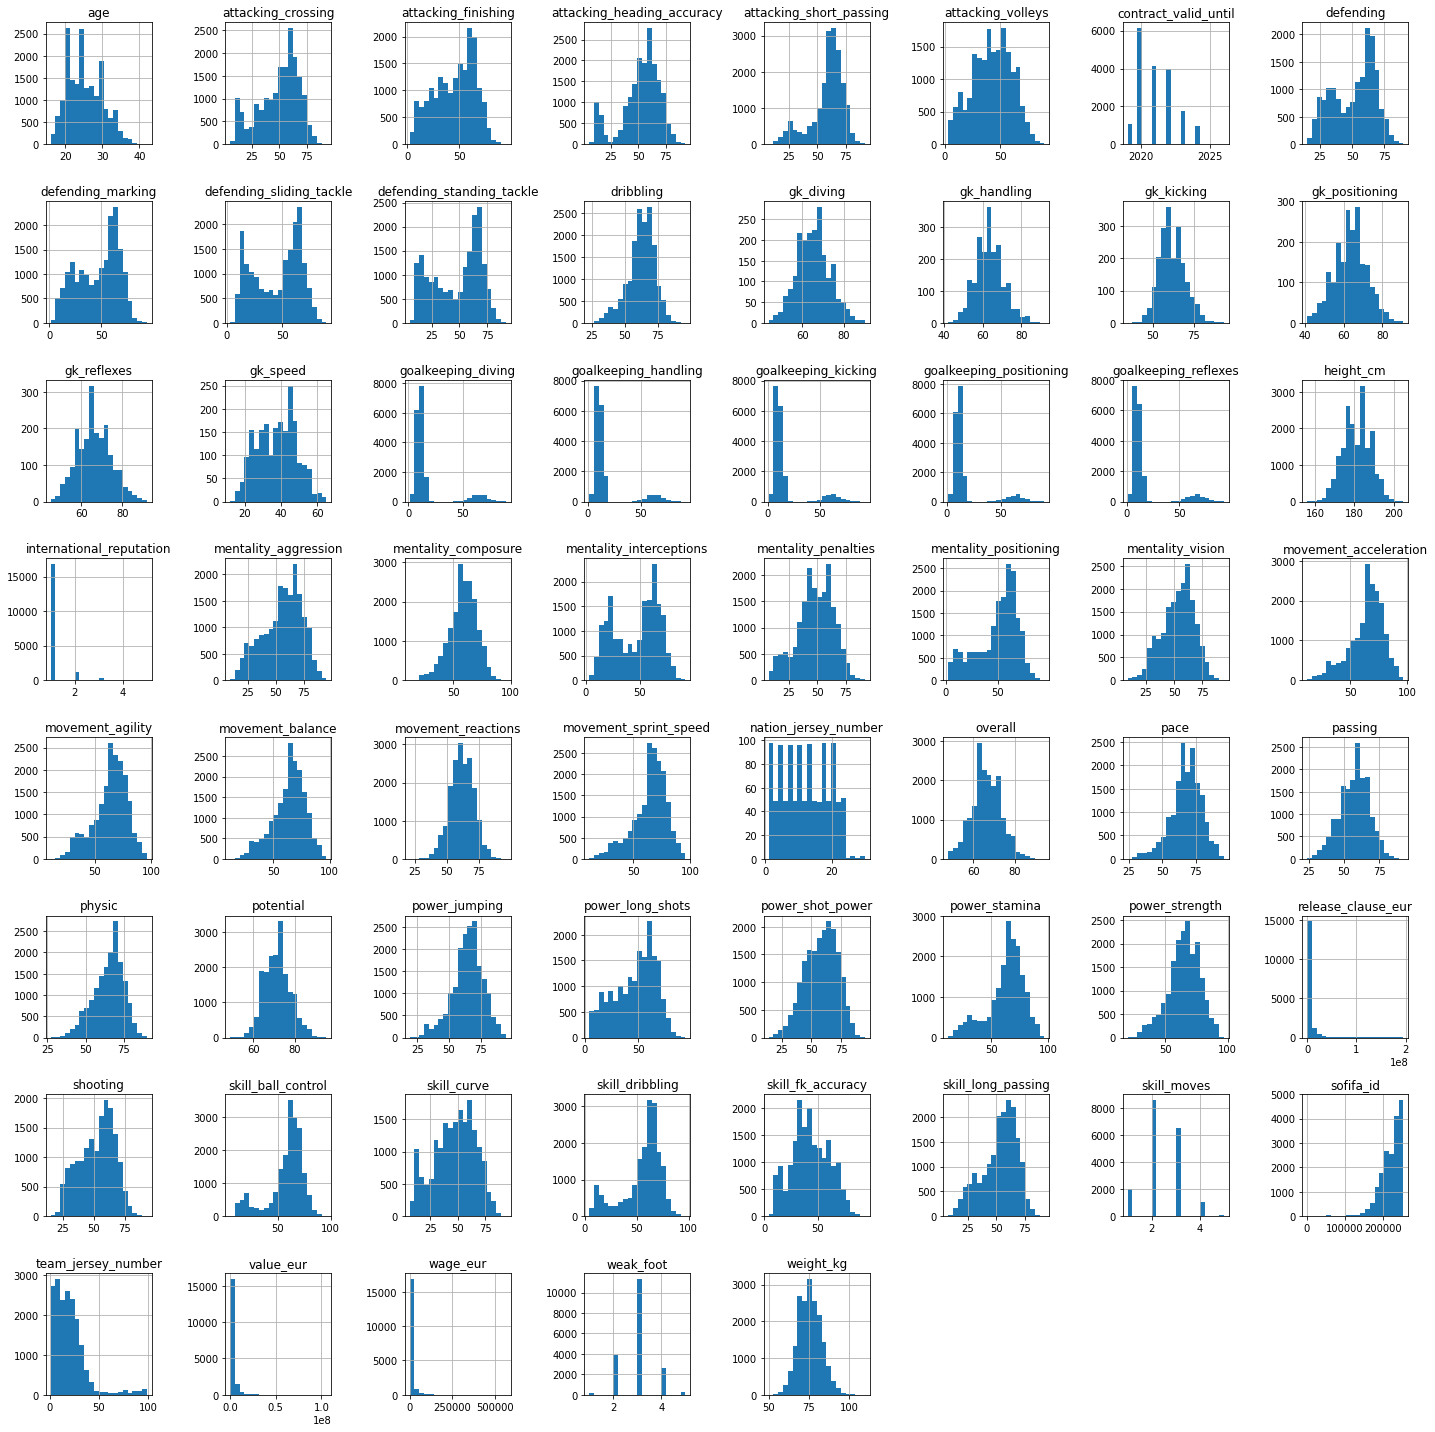

In [197]:
df.hist(bins=20, figsize=(20,20))
plt.tight_layout()

# First let's explore the features of the dataset

# Features - Attributes

In [87]:
pd.set_option('display.max_seq_items', None)
print('There are', len(df.columns), 'features')
df.columns

There are 104 features


Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

The features can be divided in a few categories:
- Positioning
- Identifiers
- Goalkeeping
- Physical
- Defending
- Shooting
- Pace
- Dribbling
- Passing

In [69]:
identifier_features = ["sofifa_id", "short_name", "long_name","overall"]

In [239]:
first_chunk = [x.split('_')[0] for x in df.columns]
sanitized_chunks = [x for x in first_chunk if len(x)>3]
set(sanitized_chunks)

{'attacking',
 'body',
 'club',
 'contract',
 'defending',
 'dribbling',
 'goalkeeping',
 'height',
 'international',
 'joined',
 'loaned',
 'long',
 'mentality',
 'movement',
 'nation',
 'nationality',
 'overall',
 'pace',
 'passing',
 'physic',
 'player',
 'potential',
 'power',
 'preferred',
 'real',
 'release',
 'shooting',
 'short',
 'skill',
 'sofifa',
 'team',
 'value',
 'wage',
 'weak',
 'weight',
 'work'}

# Positioning

There are positioning-specific features in the dataset. Also some positioning-related or correleted ones.

In particular we have the position features that relate to the following image:

<img src="https://www.fifauteam.com/wp-content/uploads/2019/10/A1934-1.jpg"/>

In [231]:
positioning_features = identifier_features + ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'player_positions']
positioning =  df[positioning_features]
print("Messi stats for positioning features!")
positioning.head(1)

Messi stats for positioning features!


,sofifa_id,short_name,long_name,overall,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,player_positions
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,94,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,"RW, CF, ST"


Correlated features are, from [an official FIFA2020 guide](https://www.fifauteam.com/choose-players-fifa-20-ultimate-team/):

> In general, these are the attributes we value the most according to the positions:
> 
> - GK | Reflexes and Diving
> - CB | Defending, Physicality and Pace for at least one of the centre backs
> - RB/LB | Defending, Pace and eventually Dribbling for RWB’s and LWB’s
> - CDM | Defending, Passing and Physicality
> - CM/CAM | Passing and Dribbling
> - WINGERS | Pace, Dribbling and Passing
> - CF/ST | Shooting, Physicality and Pace

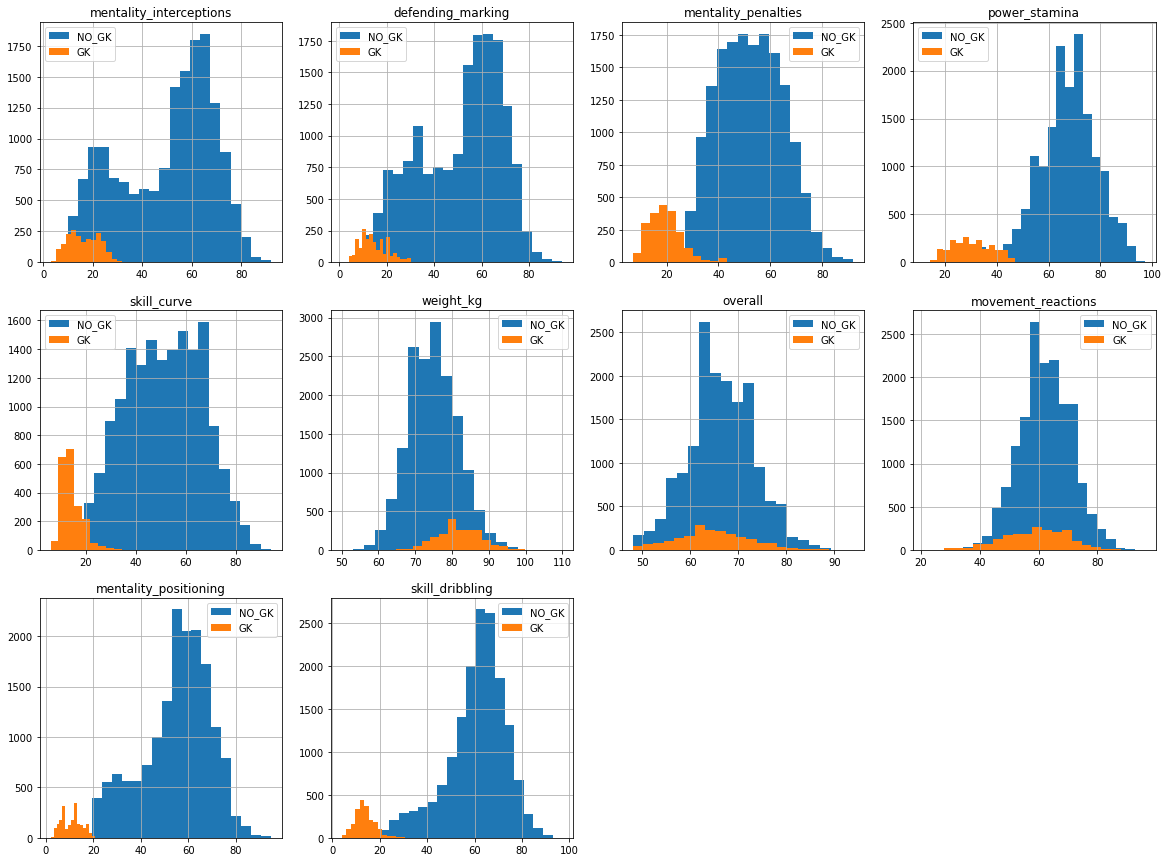

In [229]:
gk_features = identifier_features + ["gk_diving","gk_handling","gk_positioning","gk_reflexes","gk_speed"]

goalkeepers = df.dropna(subset=gk_features)
no_goalkeepers = df[np.isnan(df["gk_diving"])]
no_goalkeepers = no_goalkeepers.drop(["gk_diving","gk_handling","gk_positioning","gk_reflexes","gk_speed"],1)

dist_cols = ["mentality_interceptions","defending_marking",
             'mentality_penalties','power_stamina',
             'skill_curve','weight_kg', 'overall', 'movement_reactions',
            'mentality_positioning','skill_dribbling']
plt.figure(figsize=(20,15));
for i, col in enumerate(dist_cols):
    plt.subplot(3, 4, i+1);
    plt.title(col)
    no_goalkeepers[col].hist(bins=20);
    goalkeepers[col].hist(bins=20);
    plt.legend(['NO_GK','GK'])

Some of these histograms of GK/noGK explain the appeareance of the distributions. Meaning, the clearcut separtion has as a latent cause the differences between GK and noGK. That's the case of skill_dribbling, skill_curve, mentality_penalties, for ex.

Yet some remain unexplained. That's the case for of mentality_positioning, where GK is one "cluster" of the distr, the overall and the movement_reactions, for ex.
 

# Goalkeepers attributes

<img src="imgs/goalkeepers.png" />


* **Diving**: Diving is GK’s ability to make a save whilst diving through the air. It is directly affected by the player’s **height**.
* **Handling**: Handling is an exclusive goalkeeper attribute used to measures how cleanly he catches the ball and does he hold on to it. In other words, it is the frequency that the keeper catches the ball rather than parrying it and whether or not he holds onto it.
* **Kicking**: Kicking it’s another attribute that only goalkeepers have, used to measures the length and accuracy of goal kicks, from out of the hands or on the ground. The length and accuracy of throws are partially determined by the kicking attribute but mainly determined by the long throw trait. 
* **GK_Positioning**: Positioning for goalkeepers is slightly different. It is the GK’s ability to position himself correctly when saving shots. It also affects the way how a goalkeeper reacts to crosses.
* **Reflexes**: Reflexes stat is the agility of the goalkeeper when making a save. In other words, it determines how quickly the goalkeeper reacts to a shot on goal. If the stat is low he will make a move later or could miss it entirely.
* **Speed**: This is another stat that only goalkeepers have. It is the ability to close down an opponent in one-on-one situations. This attribute is especially important if you use the off-side trap to stop your opponents.

In [70]:
gk_features = identifier_features + ["gk_diving","gk_handling","gk_positioning","gk_reflexes","gk_speed"]
goalkeepers = df[gk_features].dropna(subset=gk_features)

In [209]:
no_goalkeepers = df[np.isnan(df["gk_diving"])]
no_goalkeepers = no_goalkeepers.drop(["gk_diving","gk_handling","gk_positioning","gk_reflexes","gk_speed"],1)
no_goalkeepers.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_kicking,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [36]:
goalkeepers.head(3)

,sofifa_id,short_name,long_name,overall,gk_diving,gk_handling,gk_positioning,gk_reflexes,gk_speed
3,200389,J. Oblak,Jan Oblak,91,87.0,92.0,90.0,89.0,52.0
6,192448,M. ter Stegen,Marc-André ter Stegen,90,88.0,85.0,88.0,90.0,45.0
13,212831,Alisson,Alisson Ramses Becker,89,85.0,84.0,90.0,89.0,51.0


In [35]:
goalkeepers.describe()

,sofifa_id,overall,gk_diving,gk_handling,gk_positioning,gk_reflexes,gk_speed
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,213512.369352,64.796660,65.422397,63.146365,63.374754,66.390472,37.798625
std,35994.426746,7.603627,7.736278,7.244023,8.447876,8.154062,10.634038
min,1179.000000,48.000000,44.000000,42.000000,41.000000,45.000000,12.000000
25%,197604.750000,60.000000,60.000000,58.000000,58.000000,60.750000,29.000000
50%,222925.500000,65.000000,65.000000,63.000000,64.000000,66.000000,39.000000
75%,239801.750000,70.000000,70.000000,68.000000,69.000000,72.000000,46.000000
max,252905.000000,91.000000,90.000000,92.000000,91.000000,92.000000,65.000000


## Goalkeepers overall performance vs global performance

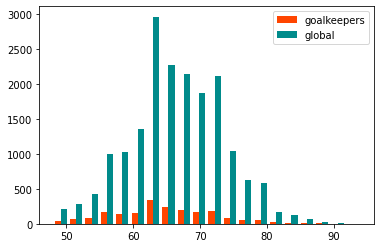

In [71]:
x = goalkeepers['overall']
y= df['overall']
plt.hist([x, y], bins=20, label=['goalkeepers', 'global'],color = ["orangered","darkcyan"], lw=0)
plt.legend(loc='upper right')
plt.show()

# Physical Attributes

<img src="imgs/physical.png"/>

* **Aggression**:measures the frequency and the aggression of jostling, tackling and slide tackling. It is the attribute which determines the player’s power of will or commitment to a match.
* **Jumping**:Jumping is the player’s ability and quality for jumping from the surface for headers. The higher the value is, the higher the player can jump. Like many others, this one is fairly useless without its *related attributes*. For example, for a player to be really good in the air, he needs to have high jumping, strength aggression and heading accuracy stats. Obviously, his height may also help a lot. A very tall player does not need to have a high jumping attribute to connect to the ball.
* **Stamina**: Stamina determines the rate at which a player will tire during a game. It evaluates how tired your player gets as the match approaches half time or full time.
* **Strength**: Strength is about the quality or state of being physically strong. The higher the value, the more likely the player will win a physical challenge. Your player’s strength stat will decide how they cope with any physical battles, so a good score in this area is important for anyone with defensive responsibilities. It’s also a desirable attribute to have for at least one of your strikers, just to give you a chance in 50-50s with defenders.

In [ ]:
#for debug
pd.set_option('display.max_seq_items', None)
[x  for x in df.columns.sort_values() if "st" in x]

In [76]:
physical_features = identifier_features + ["power_strength","power_stamina","power_jumping","mentality_aggression"]
physical = df[physical_features]
physical.describe()

,sofifa_id,overall,power_strength,power_stamina,power_jumping,mentality_aggression
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,66.244994,65.234763,62.889485,64.928165,55.742149
std,27960.200461,6.949953,12.534811,16.017954,11.934059,17.318157
min,768.000000,48.000000,20.000000,12.000000,19.000000,9.000000
25%,204445.500000,62.000000,58.000000,56.000000,58.000000,44.000000
50%,226165.000000,66.000000,66.000000,66.000000,66.000000,58.000000
75%,240795.750000,71.000000,74.000000,74.000000,73.000000,69.000000
max,252905.000000,94.000000,97.000000,97.000000,95.000000,95.000000


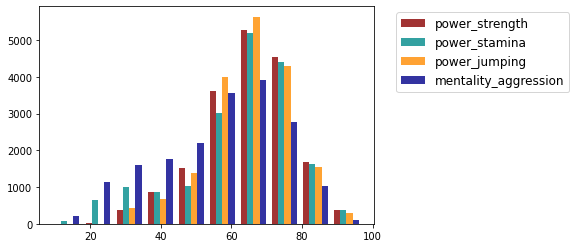

In [138]:
hists = []
phys_features = ["power_strength","power_stamina","power_jumping","mentality_aggression"]
for x in phys_features:
    hists.append(physical[x])
plt.hist(hists, bins=10, label = phys_features,color=['darkred','darkcyan', 'darkorange','darkblue'], alpha=.8)
plt.legend(loc='upper right',bbox_to_anchor=(1.6, 1),fontsize='large')
plt.show()

# Defending Attributes

<img src="imgs/defending.png"/>

* **Heading accuracy**: This stats measures the heading accuracy of the player for either a pass or a shot.
* **Interceptions**: Interception determines the ability to read the game and intercept passes.
* **Marking**: Marking is the ability to track and defend an opposing player. In other words, it is player’s ability to stay close to an opposing attacker and stop him getting to a cross/pass from a teammate. Also contributes to tracking runs.
* **Sliding tackle**: This stats measures the ability of the player to time sliding tackles so that they win the ball rather than give away a foul.
* **Standing tackle**: This stats measures the ability of the player to time sliding tackles so that they win the ball rather than give away a foul.

In [121]:
defending_features = identifier_features + ["defending_standing_tackle","defending_sliding_tackle","attacking_heading_accuracy","mentality_interceptions","defending_marking"]
defending = df[defending_features]
defending.head(1)

,sofifa_id,short_name,long_name,overall,defending_standing_tackle,defending_sliding_tackle,attacking_heading_accuracy,mentality_interceptions,defending_marking
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,94,37,26,70,40,33


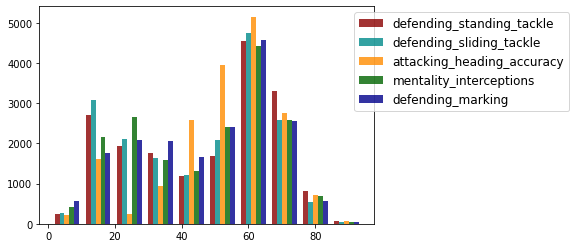

In [137]:
hists = []
def_features = ["defending_standing_tackle","defending_sliding_tackle","attacking_heading_accuracy","mentality_interceptions","defending_marking"]
for x in def_features:
    hists.append(defending[x])
plt.hist(hists, bins=10, label = def_features,color=['darkred','darkcyan', 'darkorange','darkgreen', 'darkblue'], alpha=.8)
plt.legend(loc='upper right',bbox_to_anchor=(1.6, 1),fontsize='large')
plt.show()

<img src="imgs/a.gif"/>

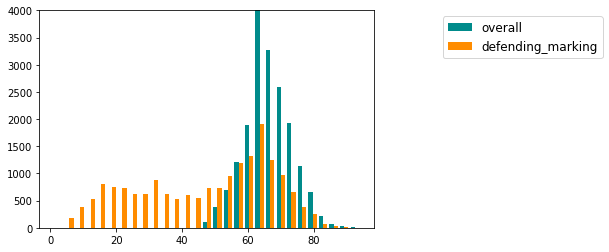

In [189]:
fig= plt.figure()
x = df["overall"]
y = defending[def_features[4]]
plt.hist([x,y], bins=29, label=["overall",def_features[4]],color=['darkcyan','darkorange'], animated=True)
plt.legend(loc='upper right',bbox_to_anchor=(1.7, 1),fontsize='large')
plt.ylim(0, 4000)
plt.show()

# Shooting Features (Delanteros)

<img src="imgs/shooting.png"/>

* **Finishing**:Finishing is the accuracy of shots using foot, inside the penalty area.
* **Long shots**: This attribute measures the accuracy of shots from outside the penalty area. This is a great attribute for **midfielders** to have.
* **Penalties**: This attribute measures the accuracy of shots from inside the penalty area.
* **Positioning**:Positioning is the player’s ability to take up good positions on the field during a game. The higher this stat, the more likely a player is to make enough space to receive the ball in dangerous areas.
* **Shot power**:Shot Power evaluates how hard the player hits the ball when taking a shot at goal. It is the amount of power a player can put into a shot while still keeping it accurate.
* **Volleys**: This attribute measures the accuracy and power of volleys at goal. It affects the technique and accuracy of shots taken while the ball is in the air. This tends to be coupled with the **balance trait** if he is not fully facing the goal.

In [242]:
shooting_features = ["attacking_finishing", "power_long_shots", "mentality_penalties",
                    "mentality_positioning","power_shot_power","attacking_volleys"]


# Pace Features

<img src="imgs/pace.png"/>

* **Acceleration**: Acceleration is the increment of a player’s running speed. The higher the value, the shorter the time needed to reach maximum speed, no matter what that is. **It needs to be considered alongside the Sprint Speed stat**. On a player with high acceleration but low sprint speed, his sprint evolves really well, but his maximum speed is pretty low. In this case, acceleration becomes almost irrelevant – it’s no good getting to your top speed really quickly if that top speed really isn’t very quick. In another hand, a player who has high sprint speed but low acceleration is able to run fast, but it takes longer for him to reach his top speed.
* **Sprint speed**:Sprint speed measures how fast the player runs while at top speed. 

In [255]:
pace_features = ["movement_acceleration","movement_sprint_speed","pace"]


# Dribbling

<img src="imgs/dribbling.png"/>

* **Agility**:Agility measures how agile the player is while moving or turning. In other words, how fast and graceful a player is able to control the ball. 
* **Balance**:Balance attribute is the ability to maintain balance after a physical challenge.
* **Ball control**:Ball control is the ability of a player to control the ball as he receives it. The higher the value, the less likely the ball is to bounce away from the player after controlling it.
* **Composure**:This attribute determines at what distance the player with the ball starts feeling the pressure from the opponent. This then affects the chances of the player making an error when he shoots, passes and crosses. The higher the value, the better the player performs when under pressure from an opponent.
* **Dribbling**:Dribbling is the player’s ability to carry the ball and past an opponent. A higher value means the player will be able to keep better possession of the ball whilst dribbling because he will keep the ball closer, making it harder for the opponent to win it off of him.
* **Reactions**:Reactions measures how quickly a player responds to a situation happening around him.

In [262]:
dribbling_features=["movement_agility","movement_balance", "skill_ball_control"
                    "mentality_composure","skill_dribbling","dribbling","movement_reactions"]


# Passing Attributes

<img src="imgs/passing.png"/>

* **Crossing**:This attribute measures how accurately the player crosses the ball during both normal running and free kick set pieces.
* **Curve**:Curve is used to measures the player’s ability to curve the ball when passing and shooting. The higher the value the more curve/curl the player is capable of putting on the ball.
* **Free kick accuracy**:Free Kick is a FIFA attribute used to measures the player’s accuracy for taking Free Kicks. The higher the value the better the accuracy of a direct free kick on goal.
* **Long passing**:This stat is used to classify how well a player performs a long pass in the air to his teammate. It doesn’t affect long ground passes.
* **Short passing**:This attribute ranks how well a player performs a short / ground pass to his teammate. In other words, it determines a player’s accuracy and speed of passing over a short distance.
* **Vision**:Vision ranks the player’s awareness of the position of his teammates & opponents around him. It is the attribute that increases (or reduces) the possibilities of a successful long pass. . The better the Vision attribute, the wider your player will see in order to locate his teammates and therefore the bigger the chances of a successful long pass. It doesn’t matter how high is the **long passing stat** of a player if he doesn’t have a decent vision.

In [263]:
passing_features = ["skill_curve","attacking_crossing","skill_long_passing","attacking_short_passing",
                   "mentality_vision",""]
#for debug
#international_reputation
#pd.set_option('display.max_seq_items', None)
#[x  for x in df.columns.sort_values() if "skill" in x]

In [264]:
df.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


# TODO:
    - maximum feature vs positioning
    - balanced dataset? check for positioning distribution. Check age distr
    - age vs overall
    - best players per position

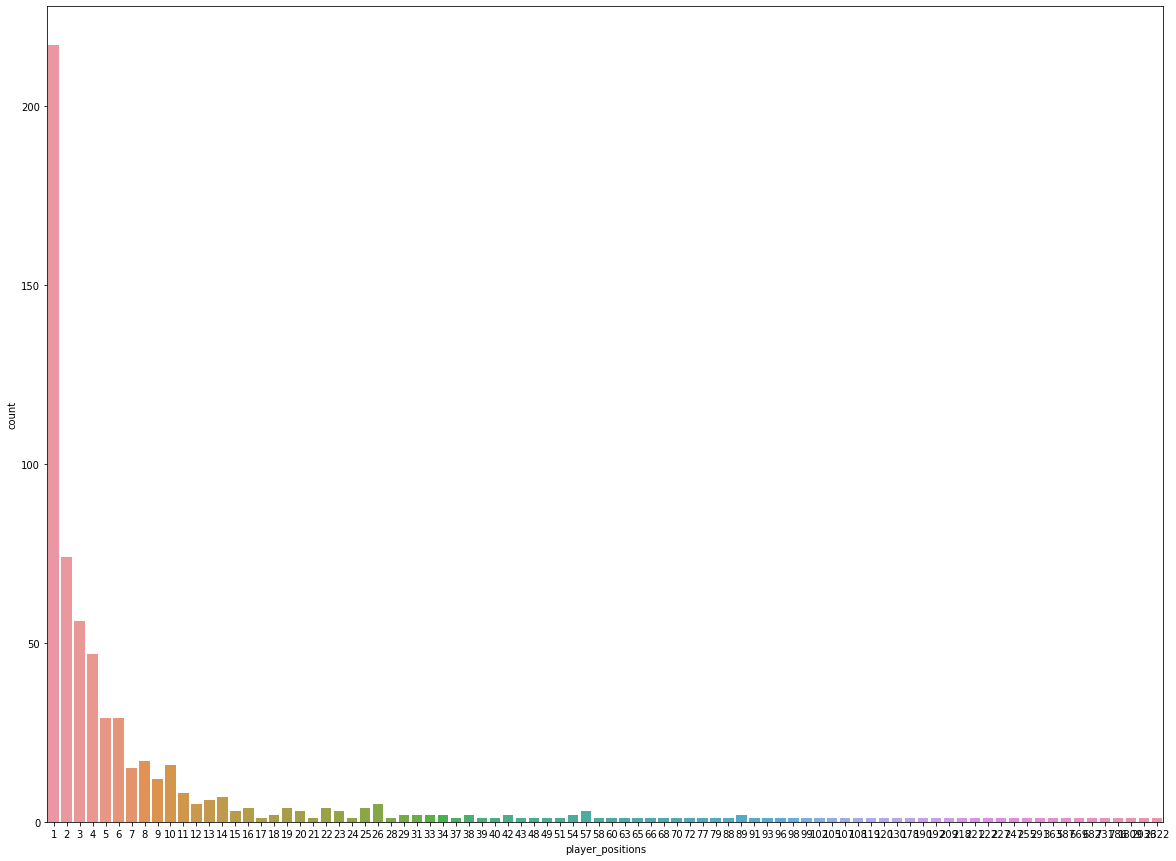

In [282]:
players_positions_distr = pd.DataFrame(df.player_positions.value_counts().sort_index())
players_positions_distr
plt.figure(figsize=(20,15))
ax = sns.countplot(x="player_positions", data=players_positions_distr)

In [292]:
age_distr = pd.DataFrame(df.age.value_counts().sort_index())
#plt.figure(figsize=(20,15))
#age_distr.hist(bins=29)
#age_distr.columns
age_distr

,age
16,12
17,229
18,640
19,1011
20,1247
21,1375
22,1446
23,1358
24,1296
25,1319


In [276]:
#best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['players_positions','short_name','overall']]
#best_players_per_position